<a href="https://colab.research.google.com/github/APURVSAXENA/Additional-Projects/blob/master/Predicting_Personal_Load_Acceptance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### <h1 align="center"> Predicting Personal Loan Acceptance </h1>

In [ ]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

## 1. Data

The data file “UniversalBank.csv” contains a dataset of 5000 customers of the Universal Bank.

Below is the description of columns in the dataset.

- Id: Customer ID
- Age: Customer’s age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer (1000 dollars)
- ZIPCode: Home Address ZIP code.
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month (1000 dollors)
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any. (1000 dollars)
- Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities_Account: Does the customer have a securities account with the bank?
- CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- CreditCard: Does the customer use a credit card issued by UniversalBank?

**Objective**: We want to build a predictive model that can accurately predict if a customer will accept personal loan offered by the Universal Bank.

In [ ]:
# Read in data
dat = pd.read_csv("../Data/UniversalBank.csv")
dat.head()

,Id,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# Descriptive statistics
dat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP_Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


We can find that the mean of Personal_Loan is 0.096. That means only 9.6% customers in the dataset accepted the personal loan. This means the dataset is imbalanced. The imbalance of the classes can be easily detected from the following frequency table and bar chart.

In [ ]:
dat['Personal_Loan'].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

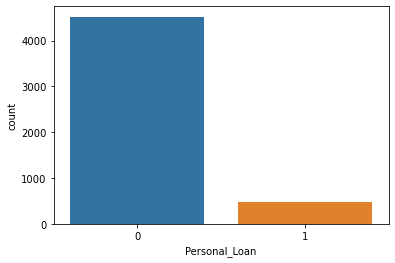

In [ ]:
sns.countplot(x="Personal_Loan", data=dat)

## 2. Data Preprocessing

In this example, we classify whether a customer accepts the personal loan (Personal_Loan) by using all other variables except customer ID and Zip Code.

### 2.1. Data Transformation

In [ ]:
# Drop Id and ZIP_Code
dat = dat.drop(['Id','ZIP_Code'], axis = 1)

### 2.2. One-Hot Encoding

Let's use one-hot encoding (or dummy encoding) to encode the education column.

In [ ]:
# One-hot encode the categorical column
X = pd.concat([dat,
               pd.get_dummies(dat['Education'],prefix='Edu')],
              axis=1)

# Drop the original categorical column and the response variable
X = X.drop(['Education','Personal_Loan'], axis=1)

X.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Edu_1,Edu_2,Edu_3
0,25,1,49,4,1.6,0,1,0,0,0,1,0,0
1,45,19,34,3,1.5,0,1,0,0,0,1,0,0
2,39,15,11,1,1.0,0,0,0,0,0,1,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,1,0,1,0


In [ ]:
y = dat['Personal_Loan']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal_Loan, dtype: int64

### 2.3. Data Partition

We use the sklearn.model_selection.train_test_split() method to split the dataset into test and training sets. Major parameters are:

- **test_size** : float, int, or None (default is None). If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is automatically set to the complement of the train size. If train size is also None, test size is set to 0.25.

- **train_size** : float, int, or None (default is None). If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.

- **random_state** : Pseudo-random number generator state used for random sampling.

- **stratify** : data is split in a stratified fashion

For the detail of the method, refer to http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

# 20-80% simple split
# To make the result reproducible, set the random_state
train_y,test_y,train_X,test_X = train_test_split(y, X,
                                                 test_size=0.2,
                                                 stratify=y,
                                                 random_state=123)

In [ ]:
train_y.shape

(4000,)

In [ ]:
test_y.shape

(1000,)

In [ ]:
train_X.shape

(4000, 13)

In [ ]:
test_X.shape

(1000, 13)

The parameter "stratify=y" makes sure that the classes keep the same relative frequency in both the training and testing datasets.

This can be verified below: the means of the Personal_Loan are the same in both the training and testing datasets.

In [ ]:
train_y.describe()

count    4000.000000
mean        0.096000
std         0.294628
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Personal_Loan, dtype: float64

In [ ]:
test_y.describe()

count    1000.000000
mean        0.096000
std         0.294739
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Personal_Loan, dtype: float64

## 3. Predictive Modeling

### 3.1. Logistic Regression without Class Weight

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logit1 = LogisticRegression(solver='liblinear')
logit1.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

As we can see from the result, the fit_intercept parameter is set as True by default. That's the reason we don't need to create the intercept term in the design matrics.

In [ ]:
pred_y_logit1 = logit1.predict(test_X)

In [ ]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')
    plt.plot()

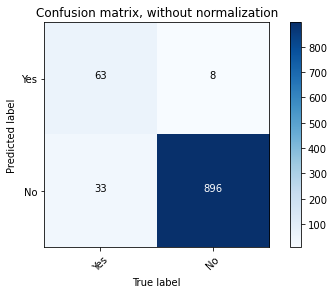

In [ ]:
from sklearn import metrics

# Compute confusion matrix
cnf_matrix_logit1 = metrics.confusion_matrix(pred_y_logit1, test_y, labels=[1,0])

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix_logit1, classes=['Yes','No'],
                      title='Confusion matrix, without normalization')

In [ ]:
# Print classification report
print(metrics.classification_report(test_y,pred_y_logit1))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       904
           1       0.89      0.66      0.75        96

   micro avg       0.96      0.96      0.96      1000
   macro avg       0.93      0.82      0.87      1000
weighted avg       0.96      0.96      0.96      1000



We can see that only 66% customers who actually accepted personal loan have been correctly classified by the logistic regression model. In practice, if it is imperative to predict customers who would like to accept personal loan (this means business for the bank), then we can actually assign a higher penalty for the customers who actually accepted the loan but were not correctly classified by the predictive model.

We can do this by using the class_weight parameter, as demonstrated below.

### 3.2. Logistic Regression with Class Weight

In [ ]:
# Assign class_weight as 10 for class 1 (class 0 will have 1 as class weight by default)
logit2 = LogisticRegression(class_weight={1:10}, solver='liblinear')
logit2.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight={1: 10}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
pred_y_logit2 = logit2.predict(test_X)

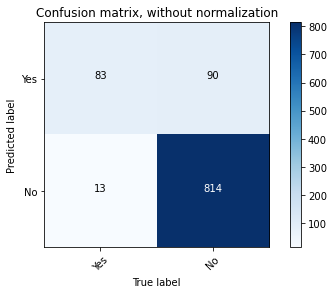

In [ ]:
# Compute confusion matrix
cnf_matrix_logit2 = metrics.confusion_matrix(pred_y_logit2, test_y, labels = [1,0])

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix_logit2, classes=['Yes','No'],
                      title='Confusion matrix, without normalization')

In [ ]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_logit2))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       904
           1       0.48      0.86      0.62        96

   micro avg       0.90      0.90      0.90      1000
   macro avg       0.73      0.88      0.78      1000
weighted avg       0.94      0.90      0.91      1000



We can see that now 86% customers who actually accepted personal loan have been correctly classified by the logistic regression model. By assigning a higher penalty to the misclassified customers who have actually accepted personal loan, we can improve the recall of the positive class significantly.

### 3.3. Support Vector Classifier with Class Weight

Now, let's extend the logistic regression modeling process to other machine learning methods. Let's choose support vector machine for classification.

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', class_weight={1: 10})
svc.fit(train_X, train_y)

SVC(C=1.0, cache_size=200, class_weight={1: 10}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
pred_y_svc = svc.predict(test_X)

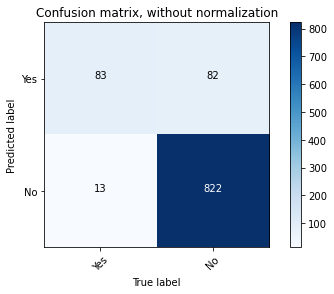

In [ ]:
# Compute confusion matrix
cnf_matrix_svc = metrics.confusion_matrix(pred_y_svc, test_y, labels=[1,0])

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix_svc, classes=['Yes','No'],
                      title='Confusion matrix, without normalization')

In [ ]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_svc))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95       904
           1       0.50      0.86      0.64        96

   micro avg       0.91      0.91      0.91      1000
   macro avg       0.74      0.89      0.79      1000
weighted avg       0.94      0.91      0.92      1000



We can find that SVM can more accurately predict the outcome than the logistic regression model.

### 3.3. Comparison

After we set the class weight to assign a larger penalty for mis-classified minority class (Personal_Loan = 1), we find the logistic regression model has improved the recall of the minority class from 0.66 to 0.86. But the precision of the minority has been reduced from 0.89 to 0.48.

This is the trade-off between precision and recall. Given a model with high recall (most of the class is correctly classified), we will have a relatively low precision (some classified instances are wrong).

The performance of all the three models can the summarized as below:

In [ ]:
acc = [metrics.accuracy_score(test_y, pred_y_logit1),
       metrics.accuracy_score(test_y, pred_y_logit2),
       metrics.accuracy_score(test_y, pred_y_svc)]

pre = [metrics.precision_score(test_y, pred_y_logit1),
       metrics.precision_score(test_y, pred_y_logit2),
       metrics.precision_score(test_y, pred_y_svc)]

rec = [metrics.recall_score(test_y, pred_y_logit1),
       metrics.recall_score(test_y, pred_y_logit2),
       metrics.recall_score(test_y, pred_y_svc)]

f1  = [metrics.f1_score(test_y, pred_y_logit1),
       metrics.f1_score(test_y, pred_y_logit2),
       metrics.f1_score(test_y, pred_y_svc)]

In [ ]:
pd.DataFrame({'Accuracy':acc,
              'Precision':pre, 
              'Recall':rec, 
              'F1 Score': f1},
             index = ['Logit without class weight',
                      'Logit with class weight',
                      'SVM with class weight'])

,Accuracy,Precision,Recall,F1 Score
Logit without class weight,0.959,0.887324,0.656250,0.754491
Logit with class weight,0.897,0.479769,0.864583,0.617100
SVM with class weight,0.905,0.503030,0.864583,0.636015


**Note**: The metrics.precision_score() method only calculate performance metrics based on the class 1.

## 4. Hypothesis Testing Using Bootstrap

As shown in the previous section, we can easily compare different models regarding their performance. For example, if we use F1 score as the criterion, we can say that the SVM with class weight has a higher F1 score than that of the logit with class weight. However, the question is whether such difference is statistically significant. We cannot evaluate the significance of performance difference since we don't know the distribution of the performance metric yet.

In this section, let's use the bootstrap method to estimate the distribution of performance metrics for different models. With such estimates, we can test hypothesis regarding the difference of performance for different models.

As the logit without class weight has too low recall, we'll not compare it in this section. Thus, our (alternative) hypothesis is:

**Hypothesis**: The logit and SVC models have different performance in terms of F1 score.

In [ ]:
# Use the sklean.utils.resample to implement the bootstrap procedure
from sklearn.utils import resample

In [ ]:
# Set the number of bootstraps
n_bootstraps = 1000

# Initiate lists of performance metric
bootstrap_f1_logit = []
bootstrap_f1_svc = []

# Set the random number seed
np.random.seed(123)

# Resample the test dataset, and calculate performance metric
for i in range(n_bootstraps):
        
    # Get a bootstrap of test dataset
    resample_test_X, resample_test_y = resample(test_X, test_y, replace = True)
    
    # Calculate predicted outcome
    pred_y_logit2_bs = logit2.predict(resample_test_X)
    pred_y_svc_bs = svc.predict(resample_test_X)
    
    # Calculate f1 score of the logit model using the bootstrap
    bootstrap_f1_logit.append(metrics.f1_score(resample_test_y, pred_y_logit2_bs))
    
    # Calculate f1 score of the logit model using the bootstrap
    bootstrap_f1_svc.append(metrics.f1_score(resample_test_y, pred_y_svc_bs))

# Convert the performance metric data as Pandas Series
bootstrap_f1_logit = pd.Series(bootstrap_f1_logit)
bootstrap_f1_svc = pd.Series(bootstrap_f1_svc)

In [ ]:
bootstrap_f1_logit.describe()

In [ ]:
bootstrap_f1_svc.describe()

In [ ]:
# Plot the performance
bootstrap_f1_logit.plot(kind='hist', title = 'Histogram of F1 score for Logit')

In [ ]:
bootstrap_f1_svc.plot(kind='hist', title = 'Histogram of F1 score for SVC')

The mean F1 score of the logit model is 0.615, while the mean F1 score of the SVC model is 0.634. Do the two F1 scores have significant difference?

Now, let's calculate 95% confidence intervals using the percentile method.

In [ ]:
# 95% confidence interval of F1 score for logit
print("(", 
      np.percentile(bootstrap_f1_logit, 2.5),
     ", ",
     np.percentile(bootstrap_f1_logit, 97.5),
     ")")

It shows that the F1 score of the logit model belongs to the range (0.542, 0.683) with 95% confidence.

In [ ]:
# 95% confidence interval of F1 score for SVC
print("(", 
      np.percentile(bootstrap_f1_svc, 2.5),
     ", ",
     np.percentile(bootstrap_f1_svc, 97.5),
     ")")

It shows that the F1 score of the SVC model belongs to the range (0.560, 0.699) with 95% confidence.

As the two intervals have overlap, the difference in F1 score between the logit and SVC models is not statistically significant. We don't have evidence to support the hypothesis that the two models have different performance in terms of F1 score. That is to say, SVC has the similar performance with logit model in terms of F1-score.

Another way to calculate the 95% confidence interval is to use normal approximation. Assume that the statistic x (F1 score in this case) follows a normal distribution, then the 95% confidence interval of x is calculated as:

$$[mean(x)-1.96*std(x), mean(x)+1.96*std(x)]$$

In [ ]:
# 95% confidence interval of F1 score for logit
print("(", 
      np.mean(bootstrap_f1_logit) - 1.96* np.std(bootstrap_f1_logit),
     ", ",
     np.mean(bootstrap_f1_logit) + 1.96* np.std(bootstrap_f1_logit),
     ")")

In [ ]:
# 95% confidence interval of F1 score for SVC
print("(", 
      np.mean(bootstrap_f1_svc) - 1.96* np.std(bootstrap_f1_svc),
     ", ",
     np.mean(bootstrap_f1_svc) + 1.96* np.std(bootstrap_f1_svc),
     ")")

We get the similar result by using the normal approximation to calculate the 95% confidence interval.

The percentile method and normal approximation method have similar results. However, the percentile method is more preferred as it is a non-parametric method: we don't need to make assumption regarding the distribution of the F1 score.